# **Life and Wellbeing Analysis**

Latest version uploaded on 14 March 2021:

Added 2020 data until 14 March 2021
- Changed label from DAILY MEDITATION to WEEKLY MEDITATION. 
- Added a new column with the WORK LIFE BALANCE SCORE that participants received in the first email
- Added a new column that categorizes the 'WORK_LIFE_BALANCE_SCORE'

### Data Context:

This dataset contains 15,977 survey responses with 24 attributes describing how we live our lives.

How can individuals transform their lifestyles to optimize personal wellbeing while actively supporting the UN Sustainable Development Goals?

Link to UN Sustainable Development Goald: https://sdgs.un.org/goals

### About the Dataset:

Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:

1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

Survey link: https://docs.google.com/forms/d/e/1FAIpQLSdRbkamYgEkFvlA0605CZSe_8-clPy3lg_Fig6Eard5syho2w/viewform

Analysis Question:

+ How can we make positive changes in our lives to enhance personal wellbeing while also contributing to the achievement of the UN Sustainable Development Goals?

+ When examining the different dimensions of wellbeing, which correlations stand out as significant in creating a more holistic and fulfilling lifestyle?

+ In pursuit of a well-balanced life, what key factors or practices have shown the most promising results as predictors of overall wellbeing and contentment?


### Target Variable: Work Life Balance Score

Why am I doing this project? 

I embarked on this project driven by a personal journey. Four years ago, I transitioned from Austria to the USA, a shift more challenging than anticipated due to stark cultural contrasts. While Europe taught me to "work to live," America's intense work ethic affected my mental well-being. Yet, the allure of financial stability and female empowerment kept me motivated. However, after being consumed by relentless work, I yearned for balance. This project is my quest to reclaim a life filled with holistic well-being and positivity.


### Table of content:

1.  **[Data Information/Description](#Info)**
    <br> 1.2 **[Data Preparation](#Clean)**
    <br> 1.3 **[Data Changes](#Change)**

2.  **[Data Exploring and Analysis](#Mung)**
<br> 2.2 **[Happiness Score](#Happy)**
<br> 2.3 **[Body Health](#Body)**
    <br> - **[Body Health Outcome](#BDOUT)**
    <br> - **[Impact of Stress](#Stress)**
    <br> - **[Correlation](#CORR)**
    <br> - **[WOKR_LIFE_BALANACE_SCORE](#catscore)**
3. **[Data Modeling](#Mod)**
<br> 3.1 **[Random Forest Model](#Ran)**
<br> 3.2 **[Model Selection and Training](#Model)**
    <br> - **[Linear Regression](#LR)**
    <br> - **[LASSO Regression](#LASSO)**
    <br> - **[Ridge Regression](#Ridge)**
    <br> - **[MSE](#MSE)**
    
4. **[Summary and Analysis Question answer](#Fin)**

In [97]:
#1. Input and Tools for Analysis 


import pandas as pd
import numpy as np

## Loading Data 

In [98]:
wellness = pd.read_excel('LifeWorkBalance.xls') # read dataset
wellness

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07 00:00:00,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07 00:00:00,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07 00:00:00,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,2015-07-07 00:00:00,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,2015-07-07 00:00:00,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,2021-03-14 05:42:00,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,2021-03-14 06:30:00,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,2021-03-14 08:35:00,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,2021-03-14 08:43:00,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


<a id="Info"></a>
# 1. Data Information/Description 

In [99]:
# first 10 rows of dataset 
wellness.head(10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,2015-07-07,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,2015-07-07,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
5,2015-07-08,3,2,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,722.3
6,2015-07-08,4,2,10,6,10,10,3,5,2,...,7,10,0,2,10,8,10,51 or more,Male,727.2
7,2015-07-09,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,676.2
8,2015-07-09,5,3,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,702.8
9,2015-07-10,4,4,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,634.4


In [100]:
wellness.info() # column names and position and dtype of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                15972 non-null  datetime64[ns]
 1   FRUITS_VEGGIES           15972 non-null  int64         
 2   DAILY_STRESS             15972 non-null  object        
 3   PLACES_VISITED           15972 non-null  int64         
 4   CORE_CIRCLE              15972 non-null  int64         
 5   SUPPORTING_OTHERS        15972 non-null  int64         
 6   SOCIAL_NETWORK           15972 non-null  int64         
 7   ACHIEVEMENT              15972 non-null  int64         
 8   DONATION                 15972 non-null  int64         
 9   BMI_RANGE                15972 non-null  int64         
 10  TODO_COMPLETED           15972 non-null  int64         
 11  FLOW                     15972 non-null  int64         
 12  DAILY_STEPS              15972 n

Age is an object which I am going to change to an intel for my further research analysis. Further, the the count of gender is important to display if there is a significant difference in this study between women and men. 

In [101]:
wellness.shape # shape of dataset

(15972, 24)

Given the huge size of the dataset we can split it into test and train set with 20/80.

In [102]:
wellness.describe()  # this function is a summary statistic of the dataset columns with integer values. 

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [103]:
wellness['WORK_LIFE_BALANCE_SCORE'].describe()

count    15972.000000
mean       666.751503
std         45.019868
min        480.000000
25%        636.000000
50%        667.700000
75%        698.500000
max        820.200000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

This score reflects how well you shape your lifestyle, habits and behaviors to maximize your overall Work-Life Balance:

► A very low score is typically below 580; 

► The average score from all respondents is around 660;

► An excellent score is above 700.

<a id="Clean"></a>
# 1.2 Data Preparation 

First we need to check if our dataset contains NaN/Missing Values. We can do this with the function is.null()

In [104]:
wellness.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

**This is a very clean dataset and contains no NaN**

This project is about cleaning data, so let's make some changes on the dataset. Let's see what objects are in this dataset and if we can rename of the values. 

In [105]:
# Find unique values of column AGE
print(wellness['AGE'].unique())

['36 to 50' '51 or more' '21 to 35' 'Less than 20']


For this research analysis I will replace the value 'less than 20' to '20 or less'

In [106]:
# pandas count distinct values in column
wellness['AGE'].value_counts()

21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: AGE, dtype: int64

In [107]:
#replacing the value 'less than 20' in the column age 
wellness['AGE']=wellness['AGE'].replace('Less than 20', '20 or less')

In [108]:
#checking on the new outcome 

In [109]:
print(wellness['AGE'].unique())

['36 to 50' '51 or more' '21 to 35' '20 or less']


In [110]:
#listing up column names 
colomn = wellness.columns
colomn

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [111]:
wellness.tail(10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
15962,2021-03-13 11:33:00,2,0,7,4,4,5,3,2,1,...,7,10,0,2,6,2,10,51 or more,Male,688.7
15963,2021-03-13 13:27:00,2,3,2,5,10,8,6,5,1,...,7,5,5,2,5,5,5,21 to 35,Female,685.6
15964,2021-03-13 19:15:00,1,1,8,3,10,10,3,5,2,...,7,5,2,2,7,5,10,51 or more,Male,689.0
15965,2021-03-14 01:42:00,5,4,2,4,8,2,2,0,1,...,7,2,1,1,1,0,2,21 to 35,Female,620.1
15966,2021-03-14 03:39:00,4,4,3,4,4,2,1,3,2,...,6,10,1,2,6,8,3,36 to 50,Male,627.6
15967,2021-03-14 05:42:00,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,2021-03-14 06:30:00,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,2021-03-14 08:35:00,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,2021-03-14 08:43:00,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0
15971,2021-03-14 09:03:00,5,4,0,2,10,10,5,1,2,...,8,5,2,2,1,8,4,21 to 35,Female,651.4


I recognized that the column 'Timestamp' is showing in later rows also time and not just the month date. For my analysis I will filter out month and year in each a new column. 

In [112]:
wellness['MONTH']=pd.DatetimeIndex(wellness['Timestamp']).month
wellness['YEAR']=pd.DatetimeIndex(wellness['Timestamp']).year
wellness.iloc[:, -2:]

,MONTH,YEAR
0,7,2015
1,7,2015
2,7,2015
3,7,2015
4,7,2015
...,...,...
15967,3,2021
15968,3,2021
15969,3,2021
15970,3,2021


<a id="Change"></a>
# 1.3 Data Changes

In [117]:
for col in wellness:
    print(wellness[col].unique())

['2015-07-07T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-07-09T00:00:00.000000000' ... '2021-03-14T08:35:00.000000000'
 '2021-03-14T08:43:00.000000000' '2021-03-14T09:03:00.000000000']
[3 2 5 4 1 0]
[2 3 1 4 5 0 datetime.datetime(2000, 1, 1, 0, 0)]
[ 2  4  3 10  5  6  7  0  8  1  9]
[ 5  3  4  9  6  7  8 10  2  1  0]
[ 0  8  4 10  5  3  1  2  6  7  9]
[ 5 10  7  4  3  1  2  8  6  9  0]
[ 2  5  3  4  0  1  6 10  8  7  9]
[0 2 5 4 3 1]
[1 2]
[ 6  5  2  3  8 10  7  4  1  0  9]
[ 4  2  5  0  1  8  7  6  3 10  9]
[ 5  4  7  8  1  3  6  2 10  9]
[ 0  5 10  4  2  1  6  3  8  9  7]
[ 7  8  5  6 10  9  4  3  2  1]
[ 5  2 10  7  0  3  1  4  8  6  9]
[ 5  2  0  3  1  7  6  4 10  8  9]
[1 2]
[ 4  3  5  8 10  1  2  7  6  0  9]
[ 0  2  8  1  3  6  5  4 10  9  7]
[ 5  6  3  0 10  2  1  7  4  8  9]
['36 to 50' '51 or more' '21 to 35' '20 or less']
['Female' 'Male']
[609.5 655.6 631.6 ... 651.7 611.5 790.5]
[ 7  8  9 10 11 12  1  2  3  4  5  6]
[2015 2016 2017 2018 2019 2020 2021]


We will take out the timestamp, the values aren't necessarily for further research. 

Taking a closer look to the variables to see their levels. 

In [118]:
levels = wellness.describe(include=object)
levels

,DAILY_STRESS,AGE,GENDER
count,15972,15972,15972
unique,7,4,2
top,3,21 to 35,Female
freq,4398,6108,9858


We found 3 variables with unique values that differ from the rest of the dataset. In next steps we visualize these and will code them new. 

In [119]:
daily_stress_series = wellness['DAILY_STRESS']

age_series = wellness['AGE']

gender_series = wellness['GENDER']

In [120]:
levels = (daily_stress_series.unique(), age_series.unique(), gender_series.unique())
levels

(array([2, 3, 1, 4, 5, 0, datetime.datetime(2000, 1, 1, 0, 0)],
       dtype=object),
 array(['36 to 50', '51 or more', '21 to 35', '20 or less'], dtype=object),
 array(['Female', 'Male'], dtype=object))

Daily_stress is listed as an object though it should be an intel, the issue is that there is a datetime in it which I will remove.

In [121]:
try:
    stress = pd.to_numeric(wellness['DAILY_STRESS'])
except Exception as e: print(e)

Invalid object type at position 10005


With this code I am able to locate where the problem occurs and can now remove it. 

In [122]:
wellness = wellness.drop([10005])

In [123]:
# next I will change it to an intel 

wellness["DAILY_STRESS"] = wellness["DAILY_STRESS"].astype(np.int64)
wellness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                15971 non-null  datetime64[ns]
 1   FRUITS_VEGGIES           15971 non-null  int64         
 2   DAILY_STRESS             15971 non-null  int64         
 3   PLACES_VISITED           15971 non-null  int64         
 4   CORE_CIRCLE              15971 non-null  int64         
 5   SUPPORTING_OTHERS        15971 non-null  int64         
 6   SOCIAL_NETWORK           15971 non-null  int64         
 7   ACHIEVEMENT              15971 non-null  int64         
 8   DONATION                 15971 non-null  int64         
 9   BMI_RANGE                15971 non-null  int64         
 10  TODO_COMPLETED           15971 non-null  int64         
 11  FLOW                     15971 non-null  int64         
 12  DAILY_STEPS              15971 n

Next I will change the variables *Age* and *Gender*. 
- Age will be continuous
   * 3 =  '36 to 50'
   * 4 = '51 or more' 
   * 2 = '21 to 35' 
   * 1 = '20 or less'
- Gender will be categorial 0 = Female and 1 = Male

In [124]:
# Replace gender values with 0 and 1

wellness['GENDER'] = wellness['GENDER'].replace({'Female': 0, 'Male': 1})
wellness['GENDER']

0        0
1        0
2        0
3        0
4        0
        ..
15967    0
15968    0
15969    1
15970    0
15971    0
Name: GENDER, Length: 15971, dtype: int64

In [128]:
# Changing age to continuous 

# Define the mapping of categories to continuous values
category_to_continuous = {
    '20 or less': 1,
    '21 to 35': 2,
    '36 to 50': 3,
    '51 or more': 4
}

# Map the 'AGE' column using the defined mapping
wellness['AGE_Continuous'] = wellness['AGE'].map(category_to_continuous)

# Display the DataFrame with the new continuous variable
wellness.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH,YEAR,AGE_continuous,AGE_Continuous
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,4,0,5,36 to 50,0,609.5,7,2015,3,3
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,3,2,6,36 to 50,0,655.6,7,2015,3,3
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,4,8,3,36 to 50,0,631.6,7,2015,3,3


<a id="Mung"></a>
# 2. Data Exploring and Analysis 

<a id="Happy"></a>
## 2.2 Happiness Score

Bar Chart to Show the Distribution of Happiness Scores

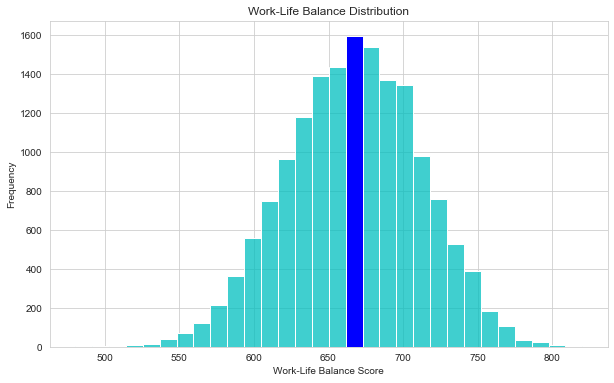

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

#Plot the histogram with different colors for the top bars and other bars
ax = sns.histplot(data=wellness, x='WORK_LIFE_BALANCE_SCORE', bins=30, color='c')


bars = ax.patches
max_height = max([bar.get_height() for bar in bars])
for bar in bars:
    if bar.get_height() == max_height:
        bar.set_facecolor('blue')

plt.ylabel('Frequency')
plt.xlabel('Work-Life Balance Score')
plt.title('Work-Life Balance Distribution')

plt.show()

Separate illustation of the happiness score of female and male 

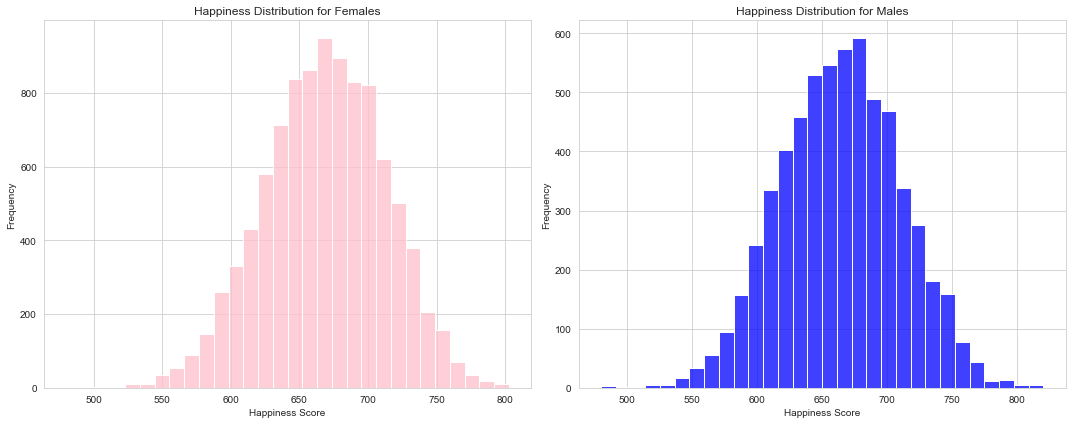

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))  

# Create a 1x2 grid of subplots
plt.subplot(1, 2, 1)  #First subplot
sns.histplot(data=wellness[wellness['GENDER'] == 0 ], x='WORK_LIFE_BALANCE_SCORE', bins=30, color='pink')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Happiness Distribution for Females')

plt.subplot(1, 2, 2)  #Second subplot
sns.histplot(data=wellness[wellness['GENDER'] ==  1 ], x='WORK_LIFE_BALANCE_SCORE', bins=30, color='blue')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Happiness Distribution for Males')

plt.tight_layout()  #Adjust spacing between subplots
plt.show()

Happiness Distribution of female show a higher frequency (over 800) than male.
This analysis shows that the distirbution of happiness scores of female see a higher frequency, this leads to the answer that females are achieve higher scores in happiness in this survey than male.

<a id="Body"></a>
## 2.3 Body Health

Let's check on the health scoreo of the individual based on their BMI.
- The body max index data in this study were collected as 1 = a BMI below 25, 2 = a BMI above 25

In [132]:
wellness['BMI_RANGE'].value_counts()

1    9413
2    6558
Name: BMI_RANGE, dtype: int64

In [133]:
#creating a new dataframe with age, gender and bmi 

BODY = wellness.pivot_table(values="BMI_RANGE", index=['GENDER'], columns=["AGE"],)
BODY.head(5)

AGE,20 or less,21 to 35,36 to 50,51 or more
GENDER,,,,
0,1.226291,1.357809,1.465046,1.525535
1,1.224138,1.327358,1.521842,1.524113


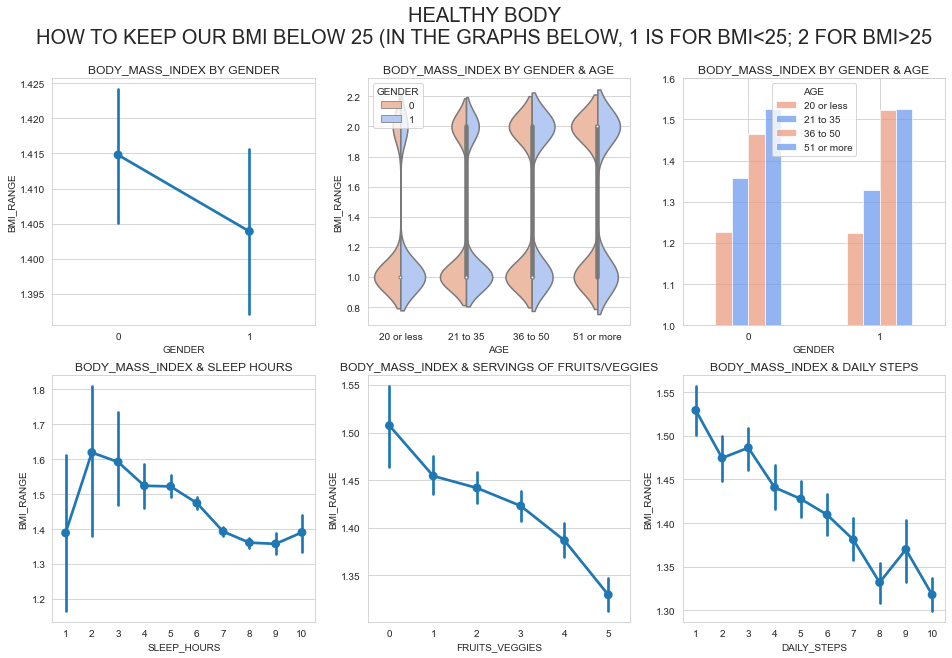

In [134]:
# HEALTHY BODY
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=wellness, ax = ax[0,0])
sns.violinplot(x = 'AGE', y = 'BMI_RANGE', hue = 'GENDER', data = wellness, palette='coolwarm_r',
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,1])

ax[0,2].set_ylim([1, 1.6])
BODY.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,2])
ax[0,2].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=wellness, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=wellness, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=wellness, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

<a id="BDOUT"></a>
### Body Health outcome: 

BMI is notably influenced by daily steps and servings of fruits & vegetables, exhibiting negative correlations. Both factors demonstrate a significant impact on BMI, with a 15% reduction associated with walking 5,000 steps daily compared to fewer than 1,000 steps. Similarly, consuming 5 servings of fruits and vegetables as opposed to less than 1 serving also corresponds to a 15% decrease in BMI. This outcome aligns intuitively with expectations, as engaging in regular physical activity and maintaining a nutritious diet are contributing factors to achieving a lower BMI.

*After a first look on the dataset I was wondering how daily stress, sleep hours, social network and supporting others can affect us.* 

<a id="Stress"></a>
### Impact of Stress:

In [219]:
print(wellness[['DAILY_STRESS', 'SLEEP_HOURS', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS', 'WORK_LIFE_BALANCE_SCORE']].describe())

       DAILY_STRESS   SLEEP_HOURS  SOCIAL_NETWORK  SUPPORTING_OTHERS  \
count  15971.000000  15971.000000    15971.000000       15971.000000   
mean       2.791685      7.042953        6.474047           5.616179   
std        1.367801      1.199053        3.086643           3.241937   
min        0.000000      1.000000        0.000000           0.000000   
25%        2.000000      6.000000        4.000000           3.000000   
50%        3.000000      7.000000        6.000000           5.000000   
75%        4.000000      8.000000       10.000000           9.500000   
max        5.000000     10.000000       10.000000          10.000000   

       WORK_LIFE_BALANCE_SCORE  
count             15971.000000  
mean                666.750510  
std                  45.021103  
min                 480.000000  
25%                 636.000000  
50%                 667.700000  
75%                 698.500000  
max                 820.200000  


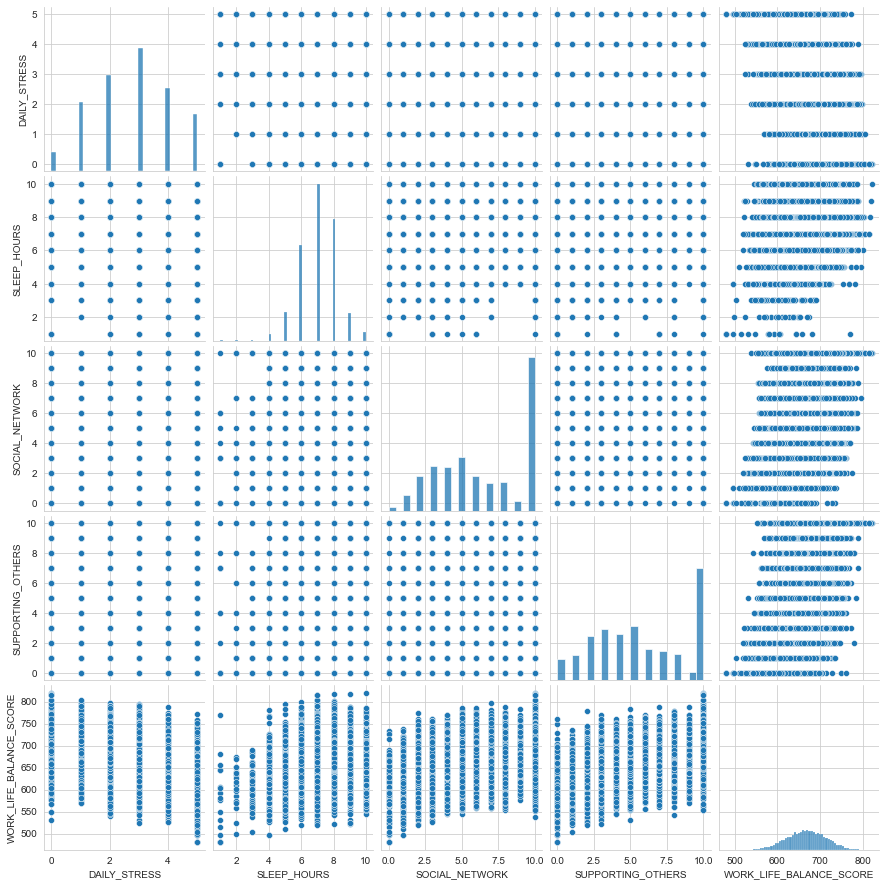

In [221]:
# Pairplot to visualize relationships
sns.pairplot(wellness[['DAILY_STRESS', 'SLEEP_HOURS', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS', 'WORK_LIFE_BALANCE_SCORE']])
plt.show()

In [224]:
import statsmodels.api as sm

# Prepare the features
X = wellness[['DAILY_STRESS', 'SLEEP_HOURS', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = wellness['WORK_LIFE_BALANCE_SCORE']

model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.514
Model:                                 OLS   Adj. R-squared:                  0.514
Method:                      Least Squares   F-statistic:                     4224.
Date:                     Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                             20:12:36   Log-Likelihood:                -77701.
No. Observations:                    15971   AIC:                         1.554e+05
Df Residuals:                        15966   BIC:                         1.555e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

#### R-squared:
- Value: 0.514
Interpretation: The model explains 51.4% of the variance in the WORK_LIFE_BALANCE_SCORE. This suggests that the chosen predictors have a significant influence on the outcome, but other factors not in the model could also play a role.

#### Coefficients:
- DAILY_STRESS:
Coefficient: -11.0102
Interpretation: For every unit increase in DAILY_STRESS, the WORK_LIFE_BALANCE_SCORE decreases by about 11.01 units, holding all other factors constant. This suggests that daily stress has a significant negative effect on work-life balance.

- SLEEP_HOURS:
Coefficient: 5.5969
Interpretation: For every additional hour of sleep, the WORK_LIFE_BALANCE_SCORE increases by approximately 5.60 units, assuming all other factors are held constant. This indicates the positive role of sleep in improving work-life balance.

- SOCIAL_NETWORK:
Coefficient: 4.1155
Interpretation: For every unit increase in SOCIAL_NETWORK, the WORK_LIFE_BALANCE_SCORE increases by about 4.12 units, holding other factors constant. Social connections are positively related to work-life balance.

- SUPPORTING_OTHERS:
Coefficient: 6.2296
Interpretation: For every unit increase in SUPPORTING_OTHERS, the WORK_LIFE_BALANCE_SCORE increases by approximately 6.23 units, given that all other factors are held constant. This underscores the positive impact of supporting others on work-life balance.

<a id="CORR"></a>
### Correlation between the variables:
This part is important, it helps companies determine which variables they want to investigate further, and it allows for rapid hypothesis testing. For my project I want to start finding the variables I will further take tests on. 

In [135]:
wellness_for_corr = wellness[['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE']]

cormat = wellness_for_corr.corr()
round(cormat,2)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.00,-0.09,0.25,0.16,0.20,0.11,0.16,0.20,-0.09,0.23,...,0.25,0.11,0.10,-0.07,-0.07,0.15,0.17,0.16,0.20,0.45
DAILY_STRESS,-0.09,1.00,-0.13,-0.12,-0.03,0.02,-0.11,-0.04,0.08,-0.16,...,-0.07,-0.13,-0.16,0.20,0.30,-0.14,-0.04,-0.16,-0.22,-0.37
PLACES_VISITED,0.25,-0.13,1.00,0.26,0.24,0.15,0.26,0.20,-0.11,0.23,...,0.20,0.14,0.13,-0.13,-0.09,0.18,0.27,0.18,0.21,0.53
CORE_CIRCLE,0.16,-0.12,0.26,1.00,0.34,0.31,0.29,0.22,-0.03,0.22,...,0.15,0.22,0.07,-0.08,-0.07,0.12,0.25,0.23,0.11,0.51
SUPPORTING_OTHERS,0.20,-0.03,0.24,0.34,1.00,0.32,0.36,0.39,0.04,0.26,...,0.15,0.24,0.01,-0.02,-0.05,0.11,0.33,0.33,0.14,0.55
SOCIAL_NETWORK,0.11,0.02,0.15,0.31,0.32,1.00,0.25,0.16,0.02,0.20,...,0.22,0.18,-0.03,0.02,-0.00,0.12,0.21,0.20,-0.01,0.41
ACHIEVEMENT,0.16,-0.11,0.26,0.29,0.36,0.25,1.00,0.23,-0.02,0.30,...,0.19,0.32,0.05,0.00,-0.04,0.11,0.40,0.37,0.16,0.56
DONATION,0.20,-0.04,0.20,0.22,0.39,0.16,0.23,1.00,0.06,0.19,...,0.11,0.16,-0.00,-0.02,-0.05,0.12,0.28,0.19,0.14,0.46
BMI_RANGE,-0.09,0.08,-0.11,-0.03,0.04,0.02,-0.02,0.06,1.00,-0.06,...,-0.13,0.00,-0.10,0.04,0.06,-0.01,0.02,-0.01,-0.08,-0.25
TODO_COMPLETED,0.23,-0.16,0.23,0.22,0.26,0.20,0.30,0.19,-0.06,1.00,...,0.20,0.27,0.11,-0.08,-0.14,0.20,0.25,0.27,0.18,0.55


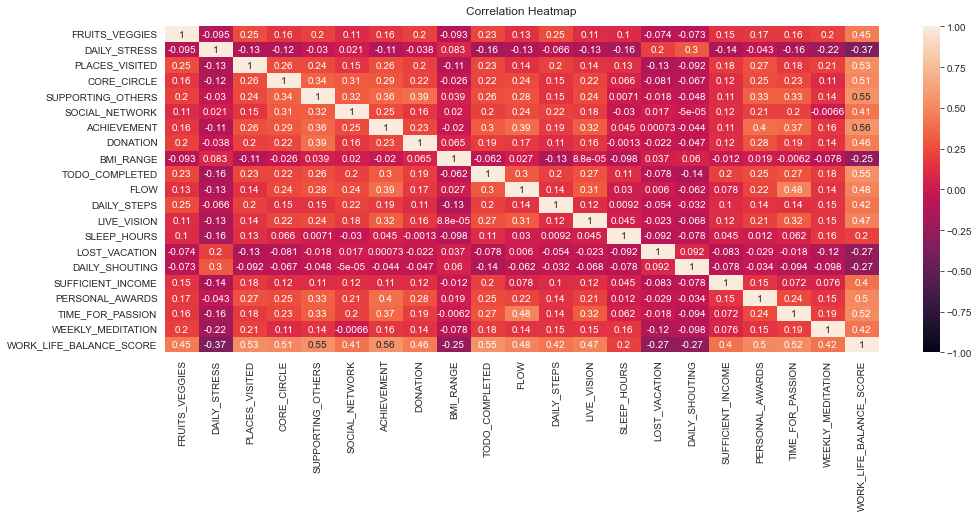

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.


heatmap = sns.heatmap((cormat), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In summary, the correlation matrix suggests that engaging in positive activities such as consuming fruits and vegetables, engaging in social and supportive interactions, achieving personal goals, and maintaining a healthy lifestyle are generally associated with higher levels of well-being and work-life balance. Conversely, factors such as lost vacation days and negative behaviors like daily shouting are negatively correlated with well-being and balance.

<a id="catscore"></a>
### Next I will categorize the 'WORK_LIFE_BALANACE_SCORE' 

In [137]:
wellness['WORK_LIFE_BALANCE_SCORE'].unique()

array([609.5, 655.6, 631.6, ..., 651.7, 611.5, 790.5])

#### YOUR WORK-LIFE BALANCE SCORE
Your Work-Life Balance Score is based on recent research published in the 360 Living guide. It is an indicator of how you thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:

   1. Healthy body, reflecting your fitness and healthy habits

   2. Healthy mind, indicating how well you embrace positive emotions

   3. Expertise, measuring the ability to grow your expertise and achieve something unique

   4. Connection, assessing the strength of your social network and your inclination to discover the world

   5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'
   
*this content was taken from the survey website* 

The Work-Life Balance Score is the total of all five categories: a  poor score is below 550,  a good score is above 680, an excellent score is above 700.

In [151]:
def categorize_score(score):
    if score <580:
        return 'Poor'
    elif 580 <= score <= 700:
        return 'Good/Average'
    else:
        return 'Excellent'
wellness['Score_Category']= wellness['WORK_LIFE_BALANCE_SCORE'].apply(categorize_score)
    
wellness['Score_Category'].value_counts()

Good/Average    11751
Excellent        3786
Poor              434
Name: Score_Category, dtype: int64

Let's visualize this outcome how participant in this survey did.

In [152]:
# FIRST a general visualization of the scoring. 

wellness.shape

(15971, 29)

In [158]:
#highest and lowest 'WORK_LIFE_BALANCE_SCORE'

wellness['WORK_LIFE_BALANCE_SCORE'].unique()

# Calculate the minimum and maximum work life balance scores
min_score = wellness['WORK_LIFE_BALANCE_SCORE'].min()
max_score = wellness['WORK_LIFE_BALANCE_SCORE'].max()

print('Minimum Work Life Balance Score:', min_score)
print('Maximum Work Life Balance Score:', max_score)

Minimum Work Life Balance Score: 480.0
Maximum Work Life Balance Score: 820.2


#### We have a pretty huge dataset with 15971 participations. 

This score reflects how well you shape your lifestyle and habits and behaviors to balance your life
priorities:

► A low score is typically below 580;

► The average score from all respondents is around 660;

► An excellent score is above 700.

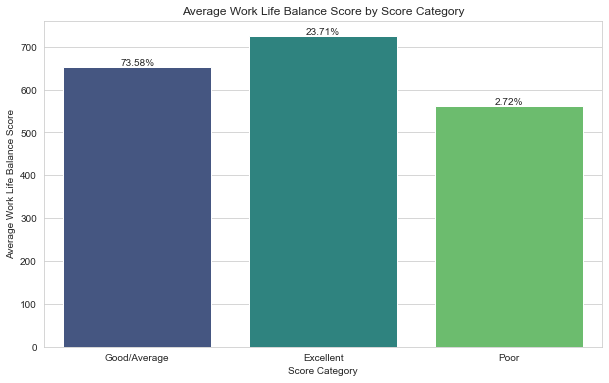

In [153]:
# Calculate the percentage of each score category
category_counts = wellness['Score_Category'].value_counts()
total_count = len(wellness)
category_percentages = (category_counts / total_count) * 100

# Create a bar plot of average work life balance score by score category
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=wellness, x='Score_Category', y='WORK_LIFE_BALANCE_SCORE', ci=None, palette='viridis')

# Annotate the bars with the percentage
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{category_percentages[i]:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Average Work Life Balance Score by Score Category')
plt.xlabel('Score Category')
plt.ylabel('Average Work Life Balance Score')
plt.show()

73.58% of the participants (male and female) recieved an score in the good/average level which is between 580 and 700. 

The highest score made is: 
    820.2

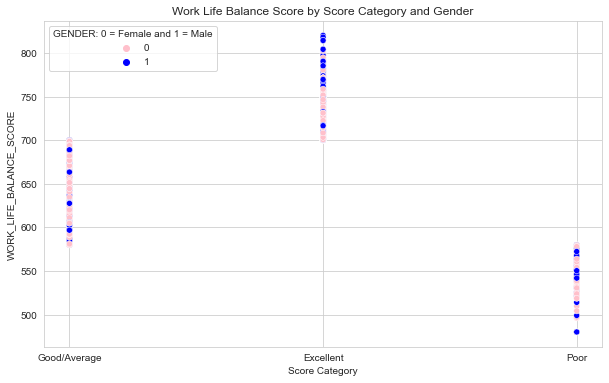

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# color palette

female_male = ['pink', 'blue']

# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wellness, y='WORK_LIFE_BALANCE_SCORE', x='Score_Category', hue='GENDER', palette=female_male)
plt.title('Work Life Balance Score by Score Category and Gender')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.xlabel('Score Category')
plt.legend(title='GENDER: 0 = Female and 1 = Male', loc='upper left')
plt.show()

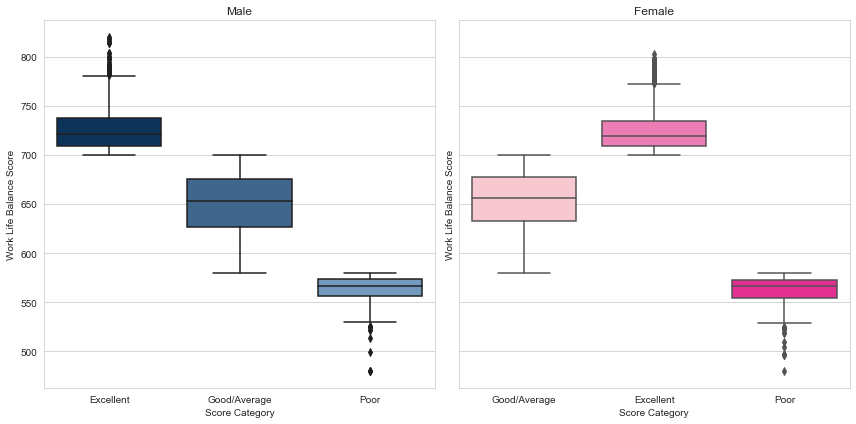

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data by gender
male_data = wellness[wellness['GENDER'] == 1]
female_data = wellness[wellness['GENDER'] == 0]

# Define a palette of different blues for male and different pink-reds for female
male_palette = ["#003366", "#336699", "#6699CC"]
female_palette = ["#FFC0CB", "#FF69B4", "#FF1493"]

# Create a figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot box plots for males and females
sns.boxplot(x='Score_Category', y='WORK_LIFE_BALANCE_SCORE', data=male_data, ax=ax[0], palette = male_palette)
ax[0].set_title('Male')
ax[0].set_xlabel('Score Category')
ax[0].set_ylabel('Work Life Balance Score')

sns.boxplot(x='Score_Category', y='WORK_LIFE_BALANCE_SCORE', data=female_data, ax=ax[1], palette = female_palette)
ax[1].set_title('Female')
ax[1].set_xlabel('Score Category')
ax[1].set_ylabel('Work Life Balance Score')

plt.tight_layout()
plt.show()

In [165]:
wellness.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH,YEAR,AGE_continuous,AGE_Continuous,Score_Category
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,0,5,36 to 50,0,609.5,7,2015,3,3,Good/Average
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,2,6,36 to 50,0,655.6,7,2015,3,3,Good/Average
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,8,3,36 to 50,0,631.6,7,2015,3,3,Good/Average


In [174]:
# for next analysis we have to make sure the timestamp is dropped

# Drop the timestamp column
wellness_new = wellness.drop(['Timestamp', 'AGE_continuous', 'Score_Category', 'AGE'], axis=1)

wellness_new.head(3)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH,YEAR,AGE_Continuous
0,3,2,2,5,0,5,2,0,1,6,...,5,1,4,0,5,0,609.5,7,2015,3
1,2,3,4,3,8,10,5,2,2,5,...,2,2,3,2,6,0,655.6,7,2015,3
2,2,3,3,4,4,10,3,2,2,2,...,2,2,4,8,3,0,631.6,7,2015,3


In [177]:
wellness_new['AGE_Continuous']

0        3
1        3
2        3
3        4
4        4
        ..
15967    4
15968    2
15969    2
15970    2
15971    2
Name: AGE_Continuous, Length: 15971, dtype: int64

<a id="Mod"></a>
# 3. Data Modeling

EDA, statstical analysis and vizualization from work above gave a good understanding what this dataset is about. We made sure their are no null values and cleaned outliers. With the creation of a new column we were abe to categorize the 'WORK_LIFE_BALANCE_SCORE' which lead to my final decision to make this the target variable for the next steps. 

Predictive Modeling 
- Target Variable: 'WORK_LIFE_BALANCE_SCORE'
- Feature Variable: ??

<a id="Ran"></a>
## 3.1 Random Forest

Random Forest is a versatile algorithm that can be used for both classification and regression tasks. One of its key benefits is its ability to compute feature importances, which can provide insights into which variables are most relevant in predicting the target variable.

In [197]:
print(wellness_new['WORK_LIFE_BALANCE_SCORE'].dtype)

float64


In [198]:
# Knowing my target variabe is a float we have to chose a random forest regressor 

import pandas as pd
from sklearn.model_selection import train_test_split


X = wellness_new.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y = wellness_new['WORK_LIFE_BALANCE_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestRegressor

# Initialize the regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# To get feature importances
importances = rf.feature_importances_
features = list(X.columns)
feature_importance = sorted(zip(importances, features), reverse=True)

for importance, feature in feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: SUPPORTING_OTHERS, Importance: 0.18038495085023779
Feature: TODO_COMPLETED, Importance: 0.14501198249364758
Feature: PLACES_VISITED, Importance: 0.12720028618302823
Feature: ACHIEVEMENT, Importance: 0.09916971894465693
Feature: SUFFICIENT_INCOME, Importance: 0.05961894634119419
Feature: WEEKLY_MEDITATION, Importance: 0.03950188406622689
Feature: TIME_FOR_PASSION, Importance: 0.03810102199927304
Feature: CORE_CIRCLE, Importance: 0.036367285267513046
Feature: LIVE_VISION, Importance: 0.034528983513928156
Feature: DAILY_STEPS, Importance: 0.03140930737290552
Feature: PERSONAL_AWARDS, Importance: 0.027443478692524458
Feature: BMI_RANGE, Importance: 0.025582711283171748
Feature: DAILY_STRESS, Importance: 0.0247564444935877
Feature: FRUITS_VEGGIES, Importance: 0.021897988581570108
Feature: DONATION, Importance: 0.021032434447040404
Feature: LOST_VACATION, Importance: 0.0189539644512192
Feature: FLOW, Importance: 0.017125906483835444
Feature: SOCIAL_NETWORK, Importance: 0.01660383096

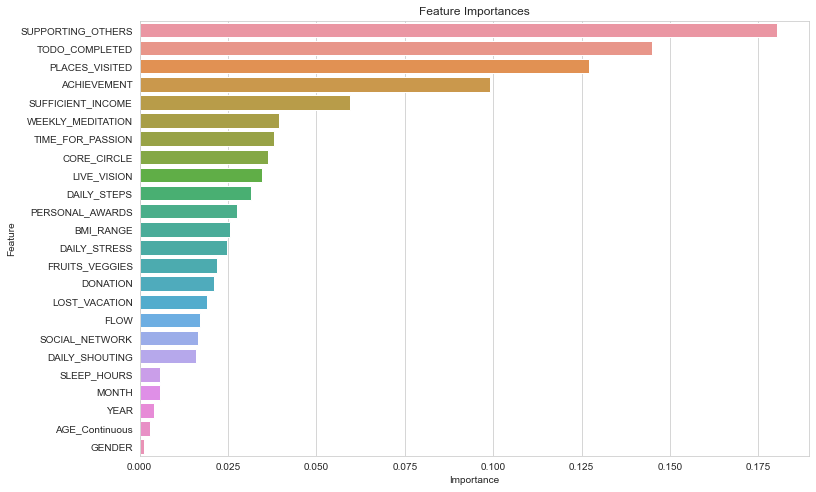

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

#### Highly Important Features:

- SUPPORTING_OTHERS: 0.1804 - This is the most influential feature, indicating that supporting others plays a significant role in predicting the target variable.
- TODO_COMPLETED: 0.1450 - Completing tasks or to-dos also has a substantial impact.
- PLACES_VISITED: 0.1272 - The number or variety of places a person has visited seems to be quite influential.

In [200]:
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (11179, 24)
y_train size: (11179,)
X_test size: (4792, 24)
y_test size: (4792,)


### Random Forest Regression

In [201]:
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf}")

Random Forest Regression MSE: 127.37591858806353


<a id="Model"></a>
## 3.2 Model Selection and Training 

<a id="LR"></a>
### Linear Regression

Linear Regression is one of the simplest and most interpretable regression models. It assumes a linear relationship between the predictors and the target variable.

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 9.321991705369633e-27


<a id="LASSO"></a>
### LASSO Regression

LASSO (Least Absolute Shrinkage and Selection Operator) Regression adds L1 regularization to the model, which can lead to some feature coefficients becoming exactly zero. This can act as a form of automatic feature selection.

In [203]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength; adjust as needed
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"LASSO Regression MSE: {mse_lasso}")

LASSO Regression MSE: 0.10222357245553182


<a id="Ridge"></a>
### Ridge Regression

Ridge Regression adds L2 regularization to the model. Unlike LASSO, it won't result in feature coefficients becoming zero, but it will shrink them towards zero.

In [204]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)  # Alpha is the regularization strength; adjust as needed
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

Ridge Regression MSE: 2.388615114471102e-07


<a id="MSE"></a>
### Comparing MSE:

In [205]:
print(f"Random Forest Regression MSE: {mse_rf}")

print(f"Linear Regression MSE: {mse_lr}")

print(f"LASSO Regression MSE: {mse_lasso}")

print(f"Ridge Regression MSE: {mse_ridge}")

Random Forest Regression MSE: 127.37591858806353
Linear Regression MSE: 9.321991705369633e-27
LASSO Regression MSE: 0.10222357245553182
Ridge Regression MSE: 2.388615114471102e-07


#### Interpret MSE values: 

Linear and Ridge Regression models have almost perfect fits, which might be a cause for concern. It's rare to get such a perfect fit without some underlying issue, like overfitting or data leakage.
LASSO Regression has a small error and might be the most reliable model of the four, given its balance between error and model simplicity.
Random Forest Regression has the highest error, which suggests it might benefit from further tuning or investigation.

Overfitting can be an issue that the model memorized the training data rather than learning the true underlying patterns.
In this step we will add a Decision Tree regressor and compare it. 
If Random Forest has the lower MSE and higher R2 compared with the decision tree, we can put its feature importance at the end. This will allow us to state which features are most influential based on the best-performing model. 

### Decision Tree Regressor 

Train model 

In [210]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

#### Random Forest Regressor Train 

In [213]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [214]:
from sklearn.metrics import mean_squared_error, r2_score

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Decision Tree - MSE: {mse_dt}, R2: {r2_dt}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Decision Tree - MSE: 549.3673622704508, R2: 0.7184309927800538
Random Forest - MSE: 127.01173831427374, R2: 0.9349022684663529


In [215]:
if mse_rf < mse_dt and r2_rf > r2_dt:
    importances = rf_reg.feature_importances_
    features = list(X_train.columns)  # assuming X_train is a DataFrame
    sorted_indices = np.argsort(importances)[::-1]

    print("Feature Importances by Random Forest:")
    for idx in sorted_indices:
        print(f"{features[idx]}: {importances[idx]}")

Feature Importances by Random Forest:
SUPPORTING_OTHERS: 0.17234215675588654
TODO_COMPLETED: 0.14960433142130794
PLACES_VISITED: 0.12120128309046575
ACHIEVEMENT: 0.10582053859804633
SUFFICIENT_INCOME: 0.06015300823439501
TIME_FOR_PASSION: 0.03988135867615851
WEEKLY_MEDITATION: 0.039831878324419
CORE_CIRCLE: 0.03678013538659992
LIVE_VISION: 0.033628761515690817
DAILY_STEPS: 0.03205748636933838
PERSONAL_AWARDS: 0.027664981098971926
BMI_RANGE: 0.02431847222609058
DAILY_STRESS: 0.023582129132780846
DONATION: 0.022661269729824605
FRUITS_VEGGIES: 0.02171148977463768
LOST_VACATION: 0.019235653110917232
FLOW: 0.017069139790785833
SOCIAL_NETWORK: 0.016923543411477796
DAILY_SHOUTING: 0.015902326425103374
SLEEP_HOURS: 0.005700397714666395
MONTH: 0.005636819821629363
YEAR: 0.004135738162955482
AGE_Continuous: 0.002928707401418667
GENDER: 0.0012283938264321262


Based on the given metrics, the Random Forest regressor outperforms the Decision Tree regressor for your dataset, as it has a lower MSE and a higher R² score. This means that the Random Forest model predicts closer to the actual values and captures more of the variance in the data compared to the Decision Tree model.

<a id="Fin"></a>
# 4. Summary and Analysis Question answer

#### How can we make positive changes in our lives to enhance personal wellbeing while also contributing to the achievement of the UN Sustainable Development Goals? 

Promoting personal well-being while contributing to the UN Sustainable Development Goals (SDGs) requires holistic thinking and action. The 17 SDGs are interrelated and synergistic. Improving your life in ways that align with these goals can contribute to a larger global impact. 

#### When examining the different dimensions of wellbeing, which correlations stand out as significant in creating a more holistic and fulfilling lifestyle? 

WORK_LIFE_BALANCE_SCORE:
- Strongly positively correlated with PLACES_VISITED (0.53) and SUPPORTING_OTHERS (0.51), suggesting that those with a higher work-life balance tend to travel more and support others, implying the importance of leisure and social support in overall well-being.

- Strongly negatively correlated with DAILY_STRESS (-0.37), indicating that a better work-life balance typically means lower daily stress.

It's essential to note that correlation does not imply causation, so while these variables are associated, one does not necessarily cause the other.

#### In pursuit of a well-balanced life, what key factors or practices have shown the most promising results as predictors of overall wellbeing and contentment?

What is the main feature of this dataset that we need for a happy life?

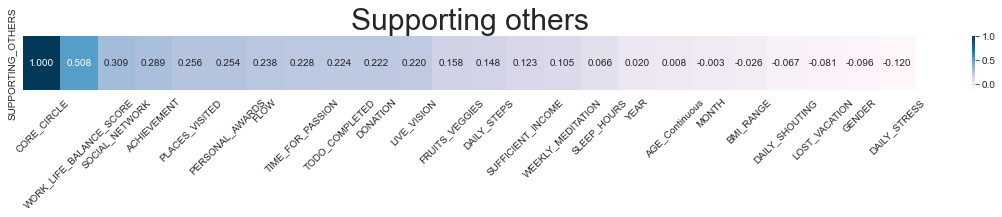

In [218]:
#In this study we analysed the work-life balance dataset. 

so_corr = wellness_new.corr().iloc[3]
plt.figure(figsize=(20,1))
df_piv = pd.DataFrame({cname: so_corr[so_corr.index==cname].iloc[0] for cname in so_corr.index},index=['SUPPORTING_OTHERS']);
df_piv.sort_values(axis=1, by='SUPPORTING_OTHERS', inplace=True, ascending=False)
df_piv.drop('SUPPORTING_OTHERS', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='PuBu');
plt.xticks(rotation=45);
plt.title('Supporting others', size=30);

### The Power of Contribution: A Key to Happiness

Modern research confirms an age-old wisdom: contributing to others is central to happiness. This act goes beyond boosting life satisfaction—it fosters deep connections, purpose, and shared joy. As we seek contentment in today's world, the path is clear: giving to others enriches our own lives immeasurably.

Key Features for a work-life balance and to generate a holistic life. 

1. Physical Health:
- Regular Exercise: Physical activity has been shown to boost mood, improve sleep, and reduce the risk of chronic diseases.
- Balanced Diet: Consuming a balanced diet rich in fruits, vegetables, whole grains, lean proteins, and healthy fats can positively influence both physical and mental health.
2. Mental and Emotional Well-being:
- Mindfulness and Meditation: Regular mindfulness practices, such as meditation, can reduce stress, enhance self-awareness, and improve emotional regulation.
- Gratitude Practices: Keeping a gratitude journal or simply recognizing and appreciating life's positives can boost overall happiness and contentment.
3. Social Connections:
- Strong Social Networks: Building and maintaining meaningful relationships has been linked to longer life, better health, and increased well-being.
- Acts of Kindness: Supporting others, whether through acts of kindness or volunteer work, can elevate mood and foster a sense of purpose.
4. Work-Life Balance:
- Time Management: Prioritizing tasks and setting boundaries can help ensure a balance between work, leisure, and rest.
- Taking Breaks: Regular breaks, vacations, or sabbaticals can rejuvenate the mind and body.
5. Lifelong Learning:
- Continuous Education: Pursuing new skills or knowledge can foster a sense of accomplishment and purpose.
- Hobbies and Interests: Engaging in activities outside of work that you're passionate about can provide relaxation and joy.
6. Sense of Purpose:
- Goal Setting: Setting and working towards personal and professional goals can offer direction and motivation.
- Alignment with Values: Living in accordance with one's core values can enhance authenticity and satisfaction.
7. Financial Stability:
- Budgeting and Saving: Financial stability, more than wealth itself, is linked to well-being. Managing finances, saving, and avoiding debt can reduce stress related to money.
8. Environment:
- Nature: Spending time in natural settings, even brief periods, can reduce stress and enhance mood.
- Organized Living Spaces: A clean and organized environment can promote mental clarity and reduce anxiety.
9. Self-Care and Rest:
- Adequate Sleep: Ensuring 7-9 hours of quality sleep is vital for cognitive function, mood, and overall health.
- Relaxation Techniques: Activities like reading, listening to music, or taking baths can help in relaxation and rejuvenation.
10. Resilience and Coping Strategies:
- Developing the ability to bounce back from adversities and using healthy coping strategies, such as seeking social support or using problem-solving techniques, can play a significant role in well-being.

Lastly, it's essential to understand that well-being is a multifaceted construct, and what works for one individual might not necessarily work for another. It's crucial to find a combination of practices and factors that align with one's unique life circumstances, values, and goals.

### Summary:

This project aimed to understand the determinants of Work-Life Balance scores, utilizing a variety of datasets and regression models. Initial visualizations revealed patterns in Body Mass Index (BMI) with respect to age, gender, daily activities, and nutrition intake. A correlation heatmap further identified interrelationships among several factors such as daily stress, places visited, achievements, and supporting others.

Upon regression analysis, features like 'SUPPORTING_OTHERS', 'TODO_COMPLETED', and 'PLACES_VISITED' emerged as significant predictors of Work-Life Balance scores. The Linear Regression model showcased almost perfect performance with a negligible Mean Squared Error (MSE), while the Random Forest Regression model had the highest MSE, suggesting potential overfitting or tuning issues. LASSO and Ridge Regression models provided more plausible, low-error results.

In conclusion, the analysis offers valuable insights into the factors impacting work-life balance, emphasizing the role of daily activities, social interactions, and personal achievements. However, caution is advised when interpreting the exceptionally low errors in some regression models, warranting further model validation.